In [26]:
import importlib
import pandas as pd
import analysis_functions as af
import analysis_functions_behv as af_b
importlib.reload(af_b)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA
from scipy.signal import savgol_filter
from scipy import stats
from scipy.io import loadmat
from scipy.ndimage import uniform_filter1d
import os
import pickle
from matplotlib.animation import FuncAnimation
from scipy.ndimage import gaussian_filter1d
from scipy.stats import friedmanchisquare
from scipy.stats import wilcoxon

In [2]:
# Load the ctl data
desktop_path = os.path.expanduser(r"C:\Users\HAOXUAN YIN\Desktop\behv data\v1_ctldata.pkl")
with open(desktop_path, 'rb') as f:
    data_ctl = pickle.load(f)

# Load the tst data 
desktop_path = os.path.expanduser(r"C:\Users\HAOXUAN YIN\Desktop\behv data\v1_tstdata.pkl")
with open(desktop_path, 'rb') as f:
    data_tst = pickle.load(f)
    data_tst.pop(13)

reward_trigger_ctl_ds = loadmat(r"C:\Users\HAOXUAN YIN\Desktop\behv data\downsampled_rewardtrigger_ctl.mat")
for ani in data_ctl:
    del data_ctl[ani]['reward_indices']
    data_ctl[ani]['reward_indices'] = np.squeeze(reward_trigger_ctl_ds['downsampled_rewardtrigger_ctl'][0][ani])

reward_trigger_tst_ds = loadmat(r"C:\Users\HAOXUAN YIN\Desktop\behv data\downsampled_rewardtrigger_tst.mat")
for ani in data_tst:
    del data_tst[ani]['reward_indices']
    data_tst[ani]['reward_indices'] = np.squeeze(reward_trigger_tst_ds['downsampled_rewardtrigger_tst'][0][ani])

for ani in data_ctl:
    data_ctl[ani]['speed'] = data_ctl[ani]['speed'] - np.percentile(data_ctl[ani]['speed'], 10)  # speed - percentile(speed)
for ani in data_tst:
    data_tst[ani]['speed'] = data_tst[ani]['speed'] - np.percentile(data_tst[ani]['speed'], 10)  # speed - percentile(speed)

In [3]:
ctl_animals = [ani for ani in data_ctl]
tst_animals = [ani for ani in data_tst]

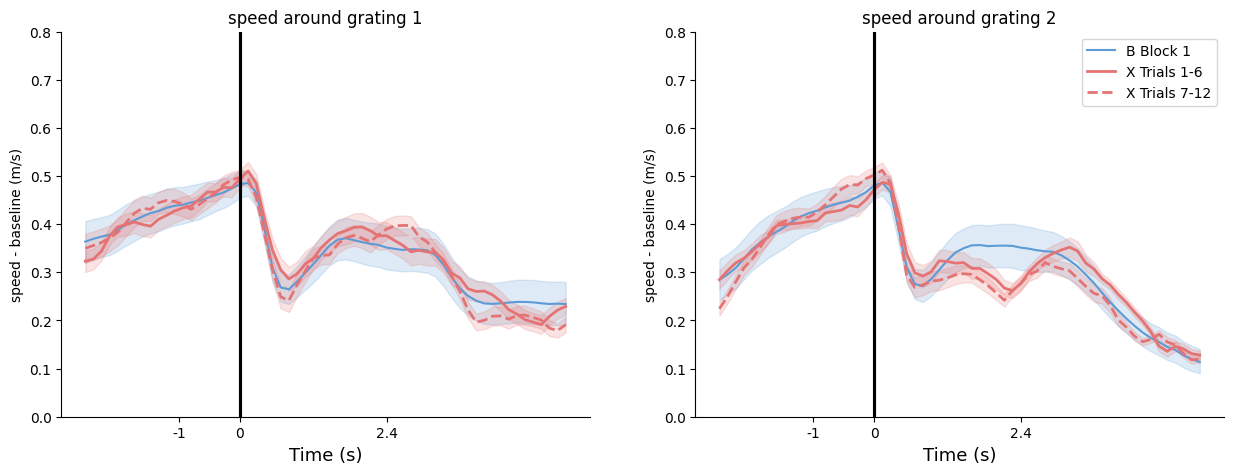

In [27]:
fig,axes = plt.subplots(1,2,figsize = (15,5))
af_b.bootstrap(data_ctl, animals = ctl_animals,  axes = axes[0], all_axes = axes, behv = 'speed', stim_type = 'grat_1', n_boot=10000, early_tri=slice(0,6),late_tri=slice(6,12))
af_b.bootstrap(data_ctl, animals = ctl_animals,  axes = axes[1], all_axes = axes, behv = 'speed', stim_type = 'grat_2', n_boot=10000, early_tri=slice(0,6),late_tri=slice(6,12))

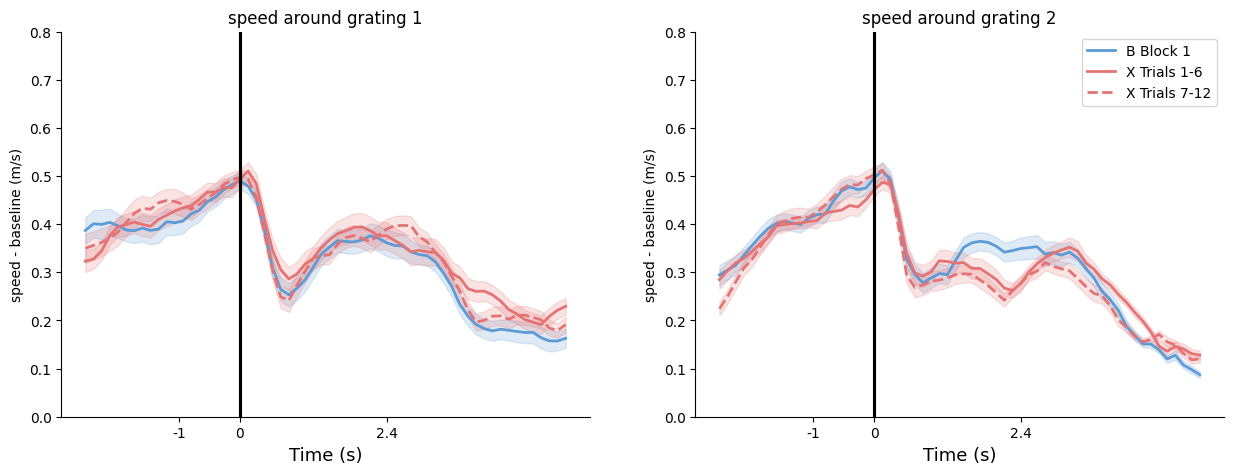

In [28]:
fig,axes = plt.subplots(1,2,figsize = (15,5))
af_b.avg_plot(data_ctl, animals = ctl_animals,  axes = axes[0], all_axes = axes, behv = 'speed', stim_type = 'grat_1', early_tri=slice(0,6),late_tri=slice(6,12))
af_b.avg_plot(data_ctl, animals = ctl_animals,  axes = axes[1], all_axes = axes, behv = 'speed', stim_type = 'grat_2', early_tri=slice(0,6),late_tri=slice(6,12))

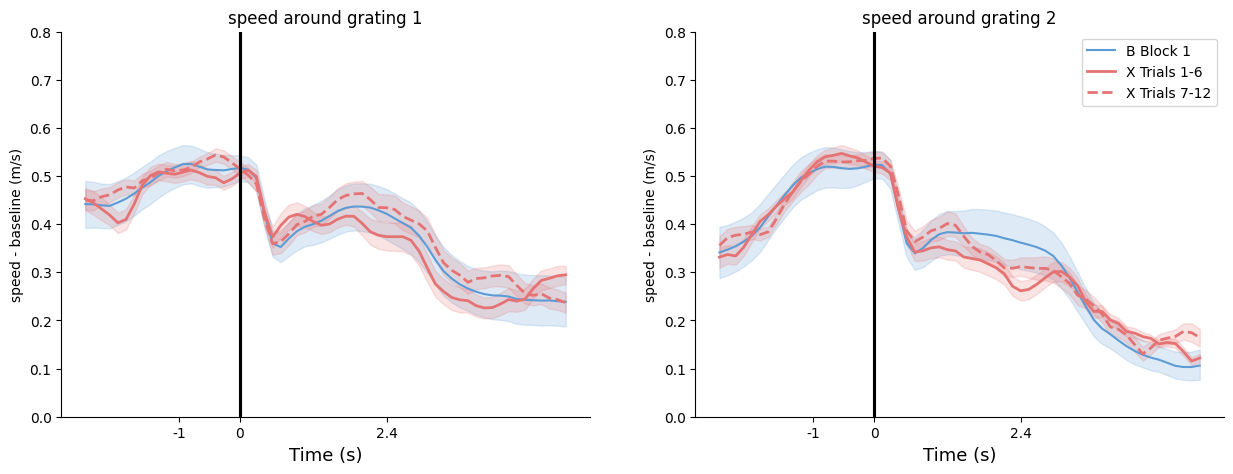

In [29]:
fig,axes = plt.subplots(1,2,figsize = (15,5))
af_b.bootstrap(data_tst, animals = tst_animals,  axes = axes[0], all_axes = axes, behv = 'speed', stim_type = 'grat_1', n_boot=10000, early_tri=slice(0,6),late_tri=slice(6,12))
af_b.bootstrap(data_tst, animals = tst_animals,  axes = axes[1], all_axes = axes, behv = 'speed', stim_type = 'grat_2', n_boot=10000, early_tri=slice(0,6),late_tri=slice(6,12))

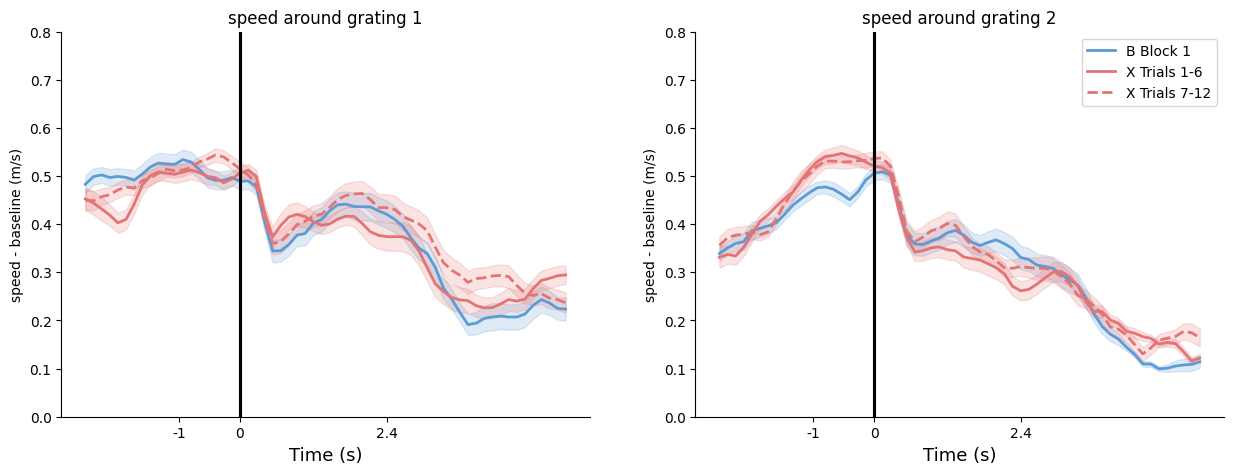

In [30]:
fig,axes = plt.subplots(1,2,figsize = (15,5))
af_b.avg_plot(data_tst, animals = tst_animals,  axes = axes[0], all_axes = axes, behv = 'speed', stim_type = 'grat_1', early_tri=slice(0,6),late_tri=slice(6,12))
af_b.avg_plot(data_tst, animals = tst_animals,  axes = axes[1], all_axes = axes, behv = 'speed', stim_type = 'grat_2', early_tri=slice(0,6),late_tri=slice(6,12))

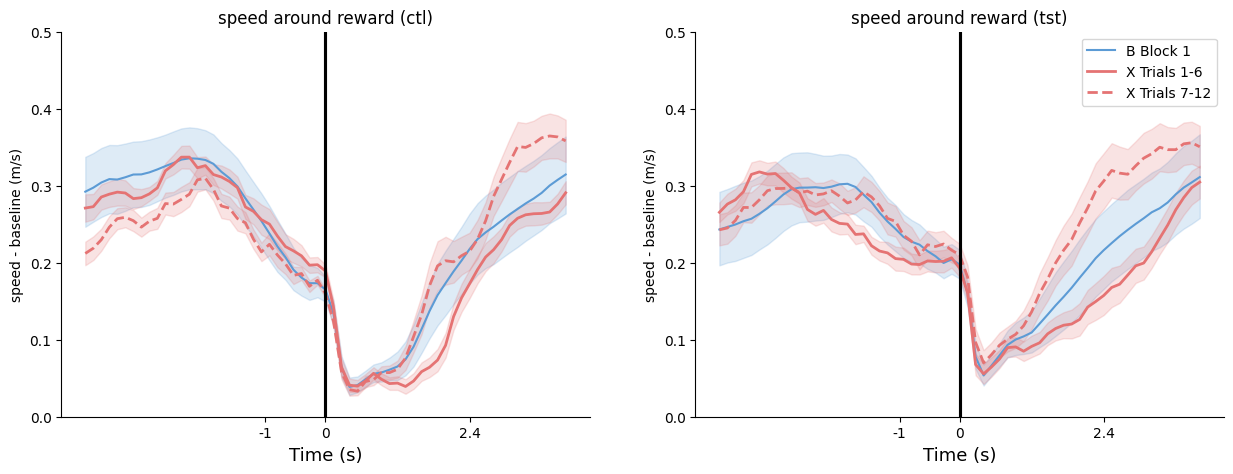

In [31]:
fig,axes = plt.subplots(1,2,figsize = (15,5))
af_b.bootstrap(data_ctl, animals = ctl_animals,  axes = axes[0], all_axes = axes, behv = 'speed', stim_type = 'rw', n_boot=10000, early_tri=slice(0,6),late_tri=slice(6,12))
af_b.bootstrap(data_tst, animals = tst_animals,  axes = axes[1], all_axes = axes, behv = 'speed', stim_type = 'rw', n_boot=10000, early_tri=slice(0,6),late_tri=slice(6,12))

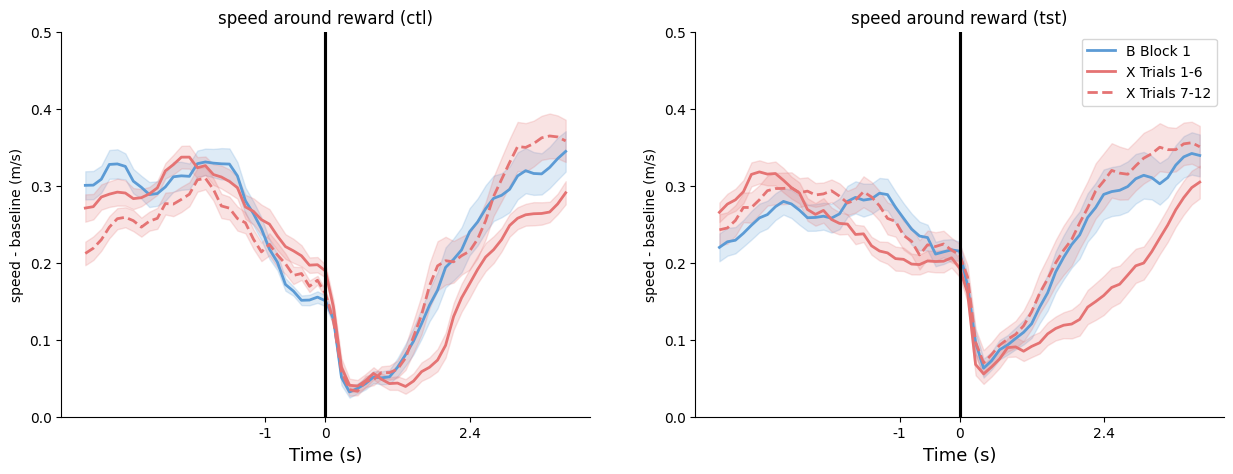

In [32]:
fig,axes = plt.subplots(1,2,figsize = (15,5))
af_b.avg_plot(data_ctl, animals = ctl_animals,  axes = axes[0], all_axes = axes, behv = 'speed', stim_type = 'rw', early_tri=slice(0,6),late_tri=slice(6,12))
af_b.avg_plot(data_tst, animals = tst_animals,  axes = axes[1], all_axes = axes, behv = 'speed', stim_type = 'rw', early_tri=slice(0,6),late_tri=slice(6,12))

In [ ]:
# Speed near reward Averaged (Ctl & Tst) 

fig,axes = plt.subplots(1,2,figsize=(10,4))

unexp_rw = {}
exp_rw = {}
for ani in data_ctl:
    unexp_rw[ani] = []
    exp_rw[ani] = []
    for trial in data_ctl[ani]['unpred_trials']['gr_2']:
        unexp_rw[ani].append(range(data_ctl[ani]['reward_indices'][trial]-30,data_ctl[ani]['reward_indices'][trial]+31)) 
    for trial in data_ctl[ani]['unpred_trials']['gr_2']:
        exp_rw[ani].append(range(data_ctl[ani]['reward_indices'][trial-1]-30,data_ctl[ani]['reward_indices'][trial-1]+31))

t_frames = 61
af.plot_shaded_error(axes[0], range(t_frames), np.mean(np.stack([data_ctl[ani]['speed'][exp_rw[ani][:6]] for ani in ctl_animals]), axis = 1),color='blue', alpha=0.2,label= 'Expected B trial')
af.plot_shaded_error(axes[0], range(t_frames), np.mean(np.stack([data_ctl[ani]['speed'][unexp_rw[ani][:6]] for ani in ctl_animals]), axis = 1) ,color='purple', alpha=0.2,label = 'Unexpected X trial')
af.plot_shaded_error(axes[0], range(t_frames), np.mean(np.stack([data_ctl[ani]['speed'][unexp_rw[ani][6:12]] for ani in ctl_animals]), axis = 1),color='purple', alpha=0.2,label= 'Expected X trial',style = 'dash')
axes[0].set_title('Speed near reward (Control)')
axes[0].axvline(x=30, color='k', linestyle='--')
axes[0].legend()

unexp_rw = {}
exp_rw = {}
for ani in data_tst:
    unexp_rw[ani] = []
    exp_rw[ani] = []
    for trial in data_tst[ani]['unpred_trials']['gr_2']:
        unexp_rw[ani].append(range(data_tst[ani]['reward_indices'][trial]-30,data_tst[ani]['reward_indices'][trial]+31)) 
    for trial in data_tst[ani]['unpred_trials']['gr_2']:
        exp_rw[ani].append(range(data_tst[ani]['reward_indices'][trial-1]-30,data_tst[ani]['reward_indices'][trial-1]+31))

t_frames = 61
af.plot_shaded_error(axes[1], range(t_frames), np.mean(np.stack([data_tst[ani]['speed'][exp_rw[ani][:6]] for ani in tst_animals]), axis = 1),color='blue', alpha=0.2,label= 'Expected B trial')
af.plot_shaded_error(axes[1], range(t_frames), np.mean(np.stack([data_tst[ani]['speed'][unexp_rw[ani][:6]] for ani in tst_animals]), axis = 1) ,color='purple', alpha=0.2,label = 'Unexpected X trial')
af.plot_shaded_error(axes[1], range(t_frames), np.mean(np.stack([data_tst[ani]['speed'][unexp_rw[ani][6:12]] for ani in tst_animals]), axis = 1),color='purple', alpha=0.2,label= 'Expected X trial',style = 'dash')
axes[1].set_title('Speed near reward (Test)')
axes[1].axvline(x=30, color='k', linestyle='--')
axes[0].set_ylabel('Speed (cm/s)')
axes[1].legend()

NameError: name 'plt' is not defined

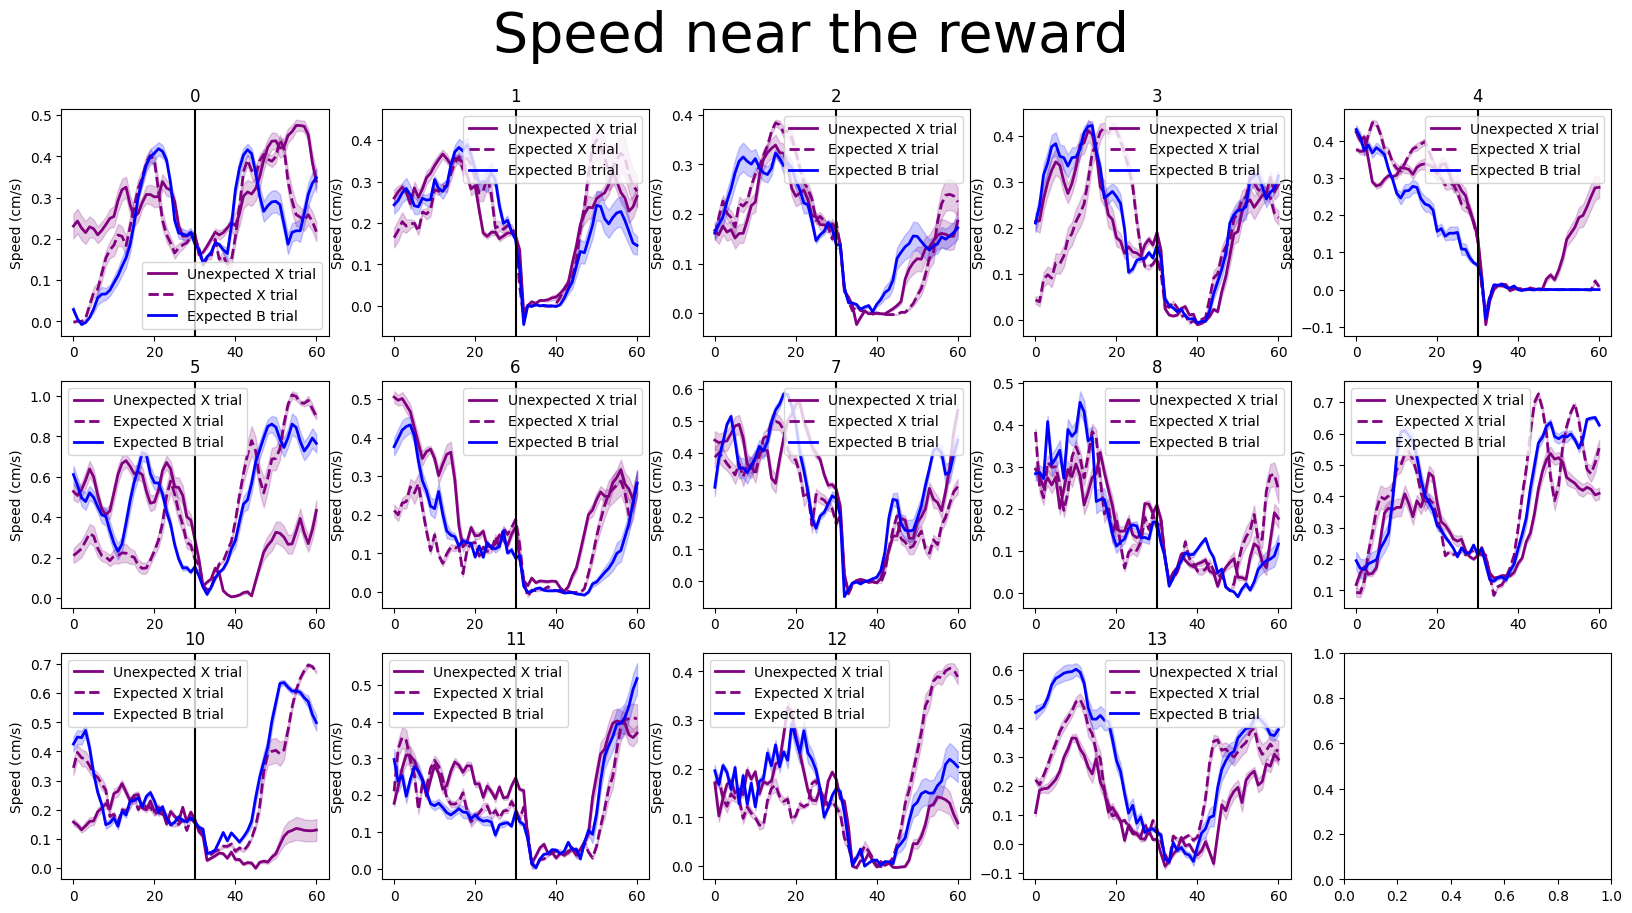

In [ ]:
# SPEED NEAR THE REWARD FOR EACH ANIMAL (ctl)
unexp_rw = {}
exp_rw = {}
for ani in data_ctl:
    unexp_rw[ani] = []
    exp_rw[ani] = []
    for trial in data_ctl[ani]['unpred_trials']['gr_2']:
        unexp_rw[ani].append(range(data_ctl[ani]['reward_indices'][trial]-30,data_ctl[ani]['reward_indices'][trial]+31)) 
    for trial in data_ctl[ani]['unpred_trials']['gr_2']:
        exp_rw[ani].append(range(data_ctl[ani]['reward_indices'][trial-1]-30,data_ctl[ani]['reward_indices'][trial-1]+31))

fig, axes = plt.subplots(3, 5, figsize=(20, 10)) 
fig.suptitle('Speed near the reward', fontsize = 40)
t_frames = range(61)
for i, ani in enumerate(data_ctl):
    row = i // 5
    col = i % 5
    ax = axes[row, col]
    af.plot_shaded_error(ax, t_frames, data_ctl[ani]['speed'][np.array(unexp_rw[ani][:6])], color='purple', alpha=0.2, label='Unexpected X trial')
    af.plot_shaded_error(ax, t_frames, data_ctl[ani]['speed'][np.array(unexp_rw[ani][6:12])], color='purple', alpha=0.2, style='dash', label='Expected X trial')
    af.plot_shaded_error(ax, t_frames, data_ctl[ani]['speed'][np.array(exp_rw[ani][6:12])], color='blue', alpha=0.2, label= 'Expected B trial')
    ax.axvline([30], color='black')
    ax.set_ylabel('Speed (cm/s)')
    ax.set_title(f'{ani}')
    ax.legend()

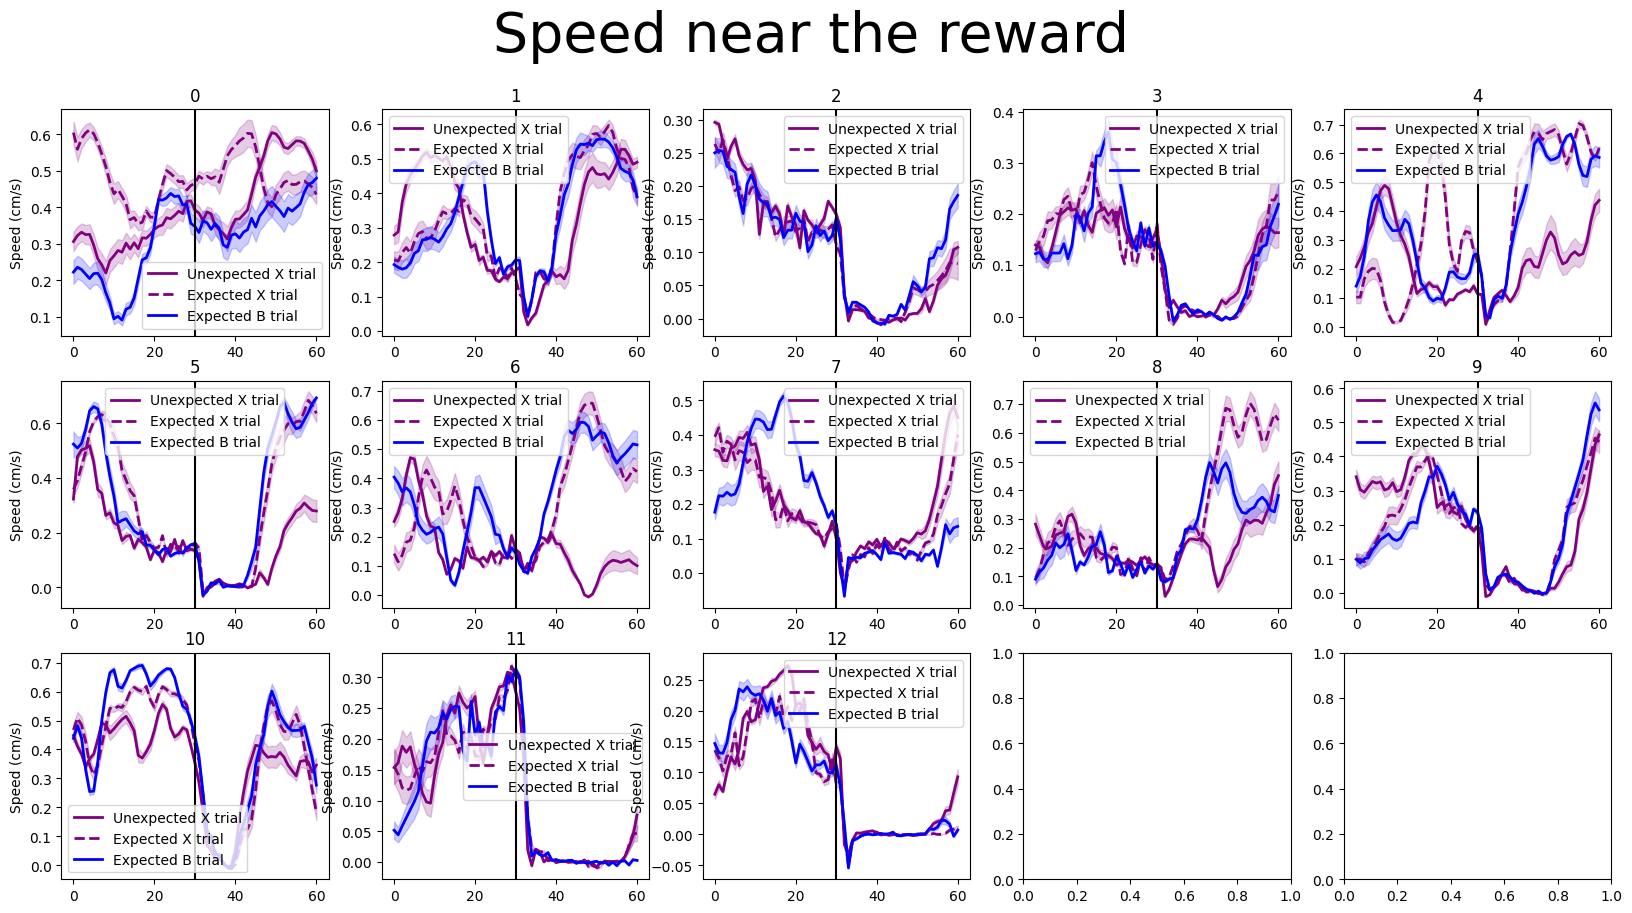

In [ ]:
# SPEED NEAR THE REWARD FOR EACH ANIMAL (tst)

unexp_rw = {}
exp_rw = {}
for ani in data_tst:
    unexp_rw[ani] = []
    exp_rw[ani] = []
    for trial in data_tst[ani]['unpred_trials']['gr_2']:
        unexp_rw[ani].append(range(data_tst[ani]['reward_indices'][trial]-30,data_tst[ani]['reward_indices'][trial]+31)) 
    for trial in data_tst[ani]['unpred_trials']['gr_2']:
        exp_rw[ani].append(range(data_tst[ani]['reward_indices'][trial-1]-30,data_tst[ani]['reward_indices'][trial-1]+31))

fig, axes = plt.subplots(3, 5, figsize=(20, 10)) 
fig.suptitle('Speed near the reward', fontsize = 40)
t_frames = range(61)
for i, ani in enumerate(data_tst):
    row = i // 5
    col = i % 5
    ax = axes[row, col]
    af.plot_shaded_error(ax, t_frames, data_tst[ani]['speed'][np.array(unexp_rw[ani][:6])], color='purple', alpha=0.2, label='Unexpected X trial')
    af.plot_shaded_error(ax, t_frames, data_tst[ani]['speed'][np.array(unexp_rw[ani][6:12])], color='purple', alpha=0.2, style='dash', label='Expected X trial')
    af.plot_shaded_error(ax, t_frames, data_tst[ani]['speed'][np.array(exp_rw[ani][6:12])], color='blue', alpha=0.2, label= 'Expected B trial')
    ax.axvline([30], color='black')
    ax.set_ylabel('Speed (cm/s)')
    ax.set_title(f'{ani}')
    ax.legend()